In [1]:
import pandas as pd
df=pd.read_csv("insurance.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric:", numeric_cols)
print("Categorical:", categorical_cols)


Numeric: Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Categorical: Index(['sex', 'smoker', 'region'], dtype='object')


In [3]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [4]:
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


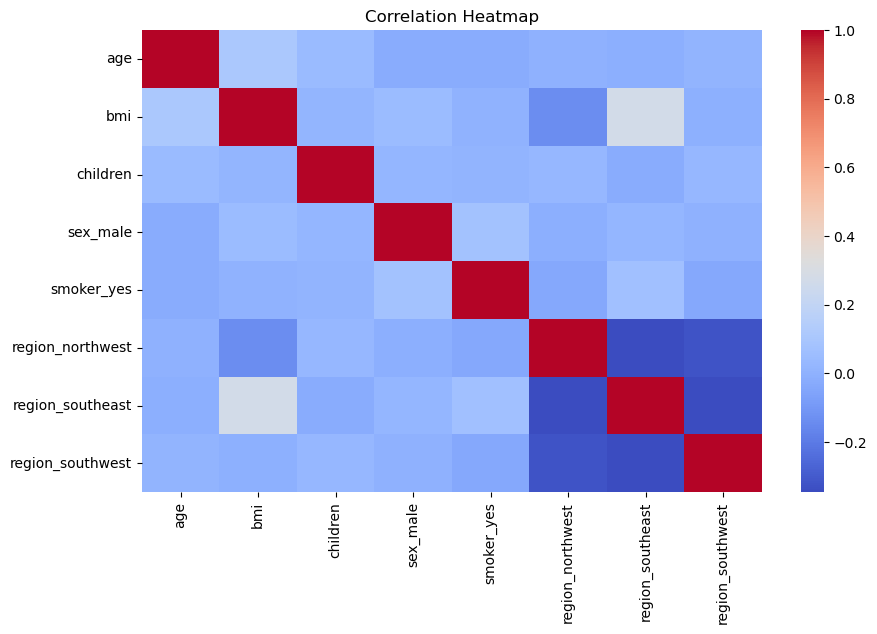

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = pd.DataFrame(X_scaled, columns=X.columns).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [6]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)


Ridge()